In [1]:
import os
import pandas as pd
import statsmodels.api as sm


import matplotlib.pyplot as plt
import numpy as np

plt.style.use("../figures/modsem.mplstyle")
base_data_path = "../data/wb_csv"
figure_path = "../figures"

all_studies = os.listdir(base_data_path)
all_studies


def load_mean_std(key):
    data = pd.read_csv(f"{base_data_path}/full_reports_ec.csv", delimiter=",")
    d_mean = data[[key, "error_nb_updates"]].groupby("error_nb_updates").mean()
    d_std = data[[key, "error_nb_updates"]].groupby("error_nb_updates").std()
    return d_mean, d_std

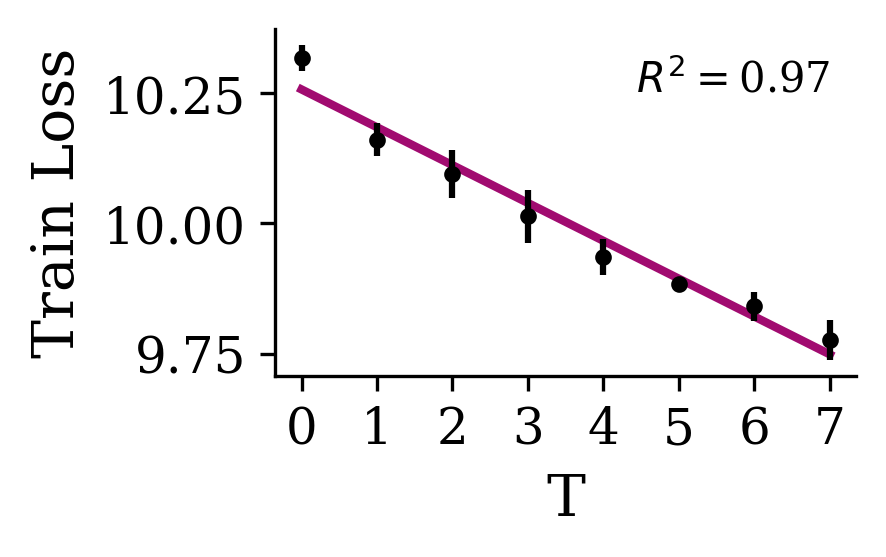

In [2]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

d_mean, d_std = load_mean_std("Loss/train_loss_epoch")

figname = "trainLoss_nbECupdates"
# data = pd.read_csv(f"{base_data_path}/{figname}.csv").drop(index=0)
x = d_mean["Loss/train_loss_epoch"].keys()
y = d_mean["Loss/train_loss_epoch"]

# x_err = d_std["Loss/train_loss_epoch"].keys()
y_err = d_std["Loss/train_loss_epoch"]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params

c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(7, np.max(y), r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="right")
ax.set_xlabel("T")
ax.set_ylabel("Train Loss")


ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

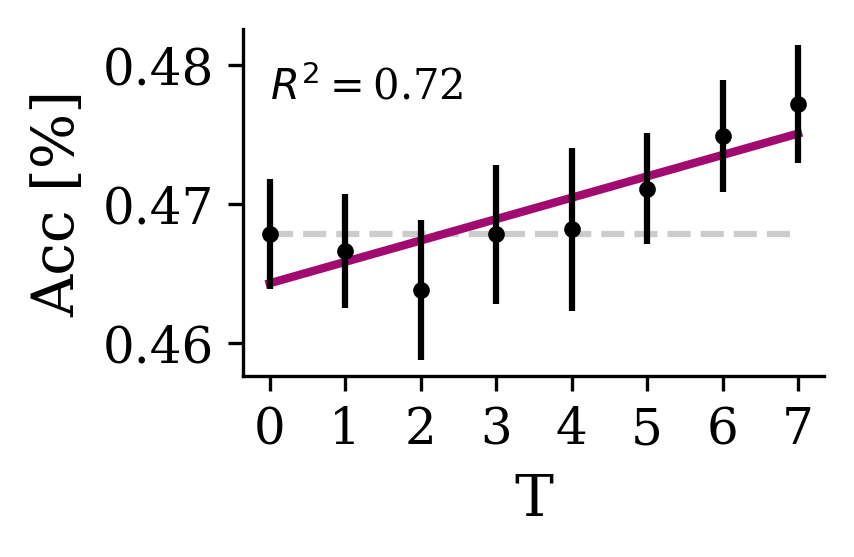

In [3]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

figname = "linperf_nbECupdates"
# data = pd.read_csv(f"{base_data_path}/{figname}.csv").drop(index=0)


d_mean, d_std = load_mean_std("Performance/linear_readout_acc")

x = d_mean["Performance/linear_readout_acc"].keys()
y = d_mean["Performance/linear_readout_acc"]
y_err = d_std["Performance/linear_readout_acc"]

# coef = np.polyfit(x, y, 1)

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params
# print(results.summary())

c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(0, 0.48, r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="left")
ax.set_xlabel("T")
ax.set_ylabel("Acc [%]")
ax.hlines(y[0], 0, 7, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0.46, 0.47, 0.48])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

In [4]:
[d for d in data.keys() if d.startswith("Manifol")]

NameError: name 'data' is not defined

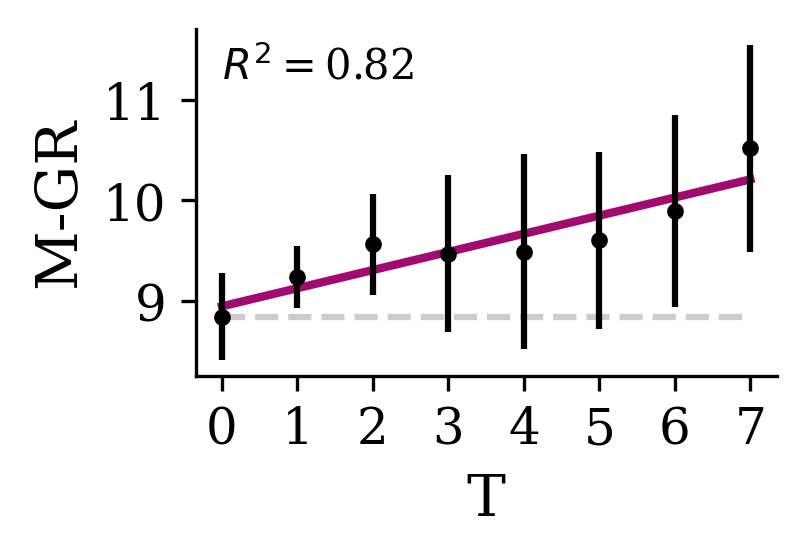

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

figname = "manifold_global_radius"
key = "Manifold Metrics/global_radius"
d_mean, d_std = load_mean_std(key)

x = d_mean[key].keys()
y = d_mean[key]
y_err = d_std[key]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params
c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(
    0, y[7] + y_err[7], r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="left"
)
ax.set_xlabel("T")
ax.set_ylabel("M-GR")
ax.hlines(y[0], 0, 7, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([9, 10, 11])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

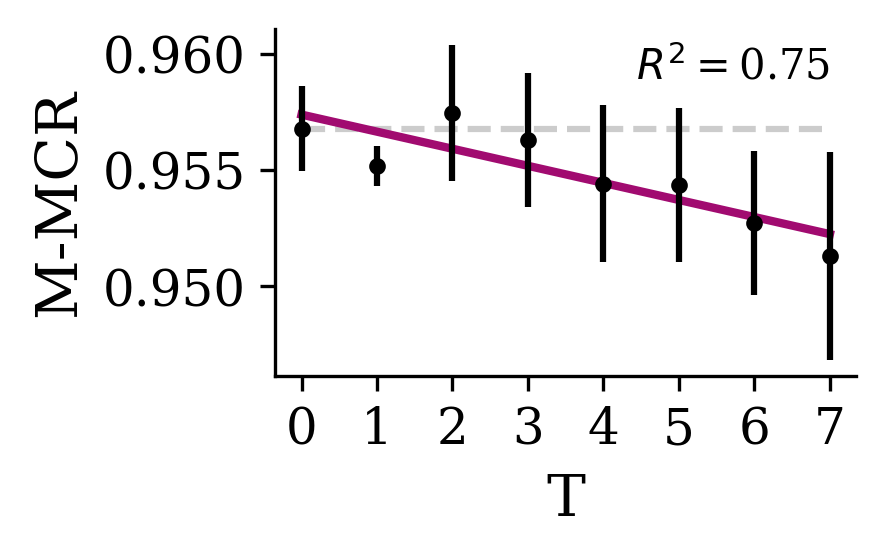

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

figname = "manifold_mean_class_radius"
key = "Manifold Metrics/mean_class_radius"
d_mean, d_std = load_mean_std(key)

x = d_mean[key].keys()
y = d_mean[key]
y_err = d_std[key]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params
c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(
    7, y[2] + y_err[2], r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="right"
)
ax.set_xlabel("T")
ax.set_ylabel("M-MCR")
ax.hlines(y[0], 0, 7, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
# ax.set_yticks([9,10,11])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

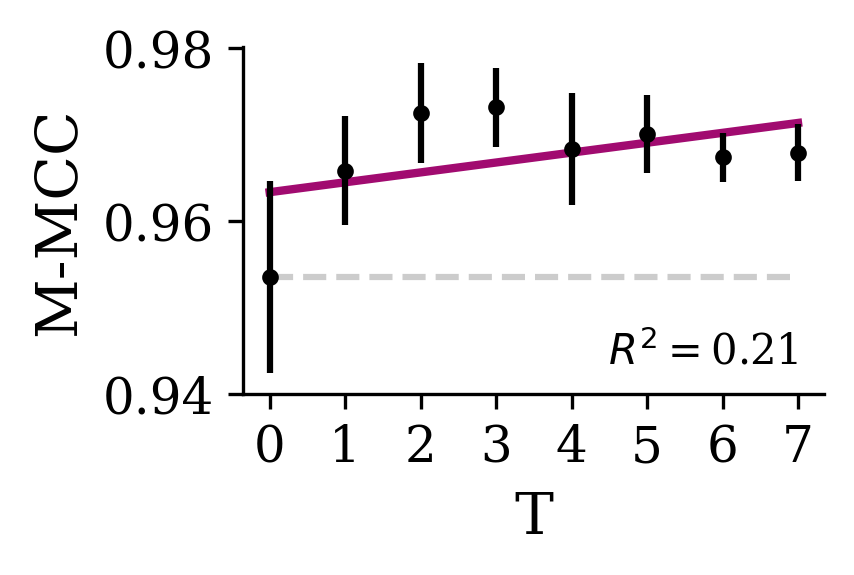

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

figname = "manifold_mean_class_correlation"
key = "Manifold Metrics/mean_class_correlation"
d_mean, d_std = load_mean_std(key)

x = d_mean[key].keys()
y = d_mean[key]
y_err = d_std[key]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params
c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(
    7, y[0] - y_err[0], r"$R^2 = $" + f"{results.rsquared:.2f}", va="bottom", ha="right"
)
ax.set_xlabel("T")
ax.set_ylabel("M-MCC")
ax.hlines(y[0], 0, 7, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0.94, 0.96, 0.98])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

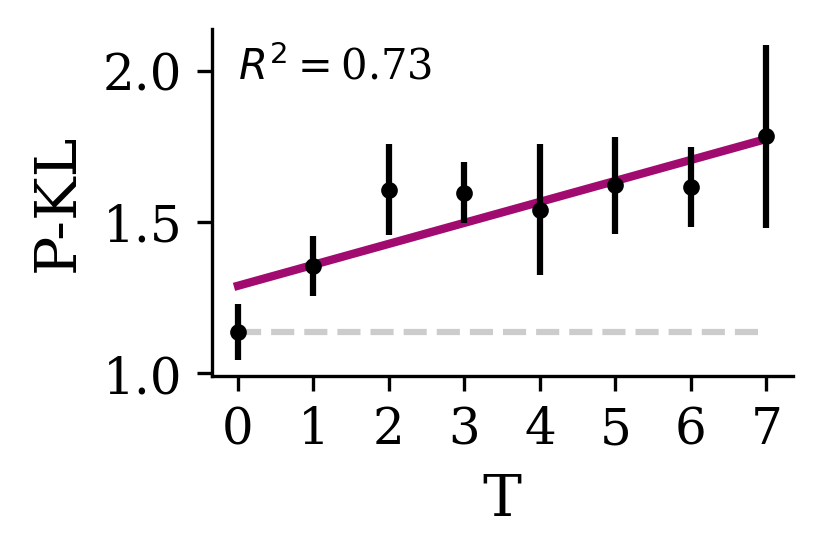

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 1.5))

figname = "push_kl"
key = "Push Metrics/kl_push"
d_mean, d_std = load_mean_std(key)

x = d_mean[key].keys()
y = d_mean[key]
y_err = d_std[key]

model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
b, m = results.params
c_x = np.linspace(0, 7)
c_y = m * c_x + b

ax.errorbar(x, y, y_err, c="k", ls="none", fmt=".")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(
    0, y[7] + y_err[7], r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="left"
)
ax.set_xlabel("T")
ax.set_ylabel("P-KL")
ax.hlines(y[0], 0, 7, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
# ax.set_yticks([9,10,11])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

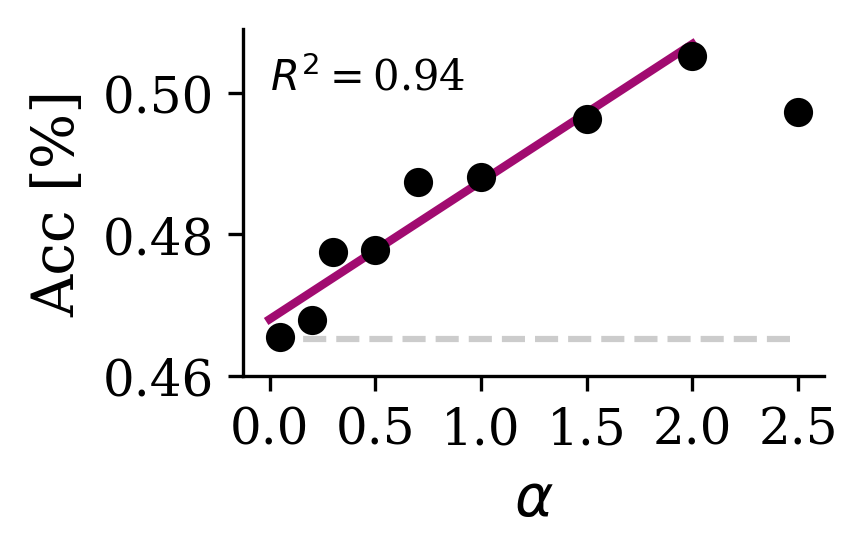

In [35]:
figname = "alpha_sweep"
data = pd.read_csv(base_data_path + f"/{figname}.csv")

x = data["alpha_error"]
y = data["Performance/linear_readout_acc"]

model = sm.OLS(y[1:], sm.add_constant(x)[1:])
results = model.fit()
b, m = results.params
c_x = np.linspace(0, 2)
c_y = m * c_x + b


fig, ax = plt.subplots(figsize=(2.5, 1.5))

ax.scatter(x, y, c="k")
ax.plot(c_x, c_y, c="#A10B70", lw=2, zorder=-1)
ax.text(0, y[1], r"$R^2 = $" + f"{results.rsquared:.2f}", va="top", ha="left")
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("Acc [%]")
ax.hlines(0.4652, 0, 2.5, alpha=0.2, zorder=-2, color="k", ls="dashed")

ax.set_xticks([0, 0.5, 1, 1.5, 2, 2.5])
ax.set_yticks([0.46, 0.48, 0.5])
fig.savefig(
    f"{figure_path}/{figname}.pdf",
    bbox_inches="tight",
)
plt.show()

In [38]:
0.5052-.4652

0.03999999999999998